# EDA Competitor data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Read data

In [2]:
competitor = pd.read_excel('Competitors.xlsx')
competitor.head(5)

,Year,Quantity,Sales
0,2020-1,1939043,1.498821e+06
1,2020-2,1013651,6.475269e+05
2,2020-3,2451126,1.403030e+06
3,2020-4,2989985,2.189583e+06
4,2020-5,6049315,4.124948e+06


In [3]:
competitor.dtypes

Year         object
Quantity      int64
Sales       float64
dtype: object

## Note:
- Convert Year and Month to date time 

In [4]:
competitor['Year'] = pd.to_datetime(competitor['Year'], format='%Y-%m')


In [5]:
competitor.head(6)

,Year,Quantity,Sales
0,2020-01-01,1939043,1.498821e+06
1,2020-02-01,1013651,6.475269e+05
2,2020-03-01,2451126,1.403030e+06
3,2020-04-01,2989985,2.189583e+06
4,2020-05-01,6049315,4.124948e+06
5,2020-06-01,2418846,1.909533e+06


In [6]:
sale = competitor['Sales']
quantity = competitor['Quantity']

# 2.Data mining


## 2.1 EDA data

In [7]:
competitor.describe()

,Year,Quantity,Sales
count,46,4.600000e+01,4.600000e+01
mean,2021-11-15 12:31:18.260869632,2.847015e+06,1.577141e+06
min,2020-01-01 00:00:00,7.103210e+05,3.740611e+05
25%,2020-12-08 18:00:00,1.974990e+06,8.904948e+05
50%,2021-11-16 00:00:00,2.537260e+06,1.476243e+06
75%,2022-10-24 06:00:00,3.275804e+06,1.914063e+06
max,2023-10-01 00:00:00,8.837352e+06,4.124948e+06
std,NaN,1.607217e+06,8.288000e+05


In [8]:
#Check null
competitor.isnull().sum()

Year        0
Quantity    0
Sales       0
dtype: int64

## 2.2 Plot 

In [9]:
competitor.set_index('Year', inplace=True)


In [10]:
competitor.describe()

,Quantity,Sales
count,4.600000e+01,4.600000e+01
mean,2.847015e+06,1.577141e+06
std,1.607217e+06,8.288000e+05
min,7.103210e+05,3.740611e+05
25%,1.974990e+06,8.904948e+05
50%,2.537260e+06,1.476243e+06
75%,3.275804e+06,1.914063e+06
max,8.837352e+06,4.124948e+06


### Histogram & Box plot


#### Sale

Text(0, 0.5, 'Count')

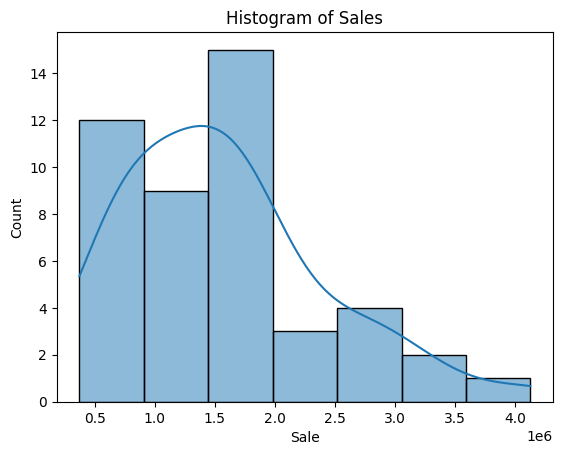

In [11]:
sns.histplot(sale, kde=True)
plt.title('Histogram of Sales')
plt.xlabel('Sale')
plt.ylabel('Count')

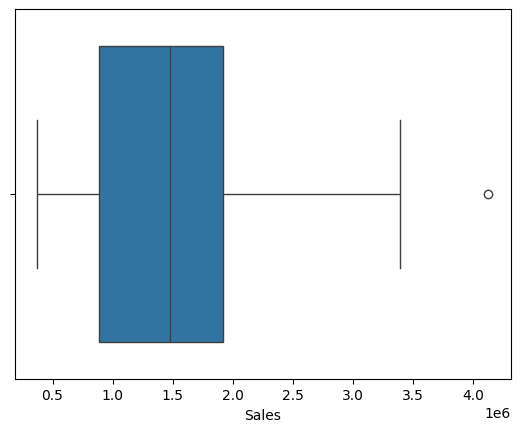

In [12]:
boxplot = sns.boxplot(x=sale)

# Calculate interquartile range
Q1 = sale.quantile(0.25)
Q3 = sale.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = competitor[(competitor['Sales'] < lower_bound) | (competitor['Sales'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Sales']))
    
plt.show()


##### Handling Sale outlier

In [13]:
sale_clip = sale.clip(upper=upper_bound,lower=lower_bound)

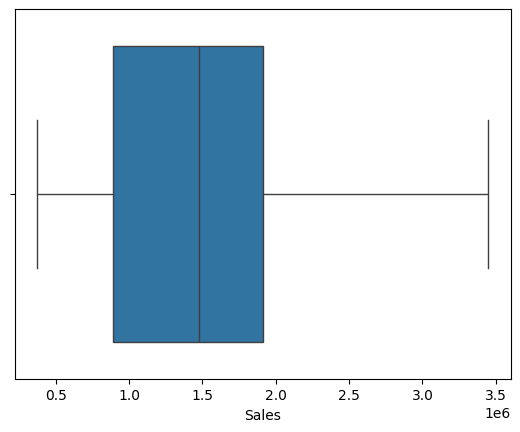

In [14]:
boxplot = sns.boxplot(x=sale_clip)

# Calculate interquartile range
Q1 = sale_clip.quantile(0.25)
Q3 = sale_clip.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.show()


In [15]:
competitor['Sale_clip'] = competitor['Sales'].clip(upper=upper_bound, lower=lower_bound)
competitor.head(6)

,Quantity,Sales,Sale_clip
Year,,,
2020-01-01,1939043,1.498821e+06,1.498821e+06
2020-02-01,1013651,6.475269e+05,6.475269e+05
2020-03-01,2451126,1.403030e+06,1.403030e+06
2020-04-01,2989985,2.189583e+06,2.189583e+06
2020-05-01,6049315,4.124948e+06,3.449415e+06
2020-06-01,2418846,1.909533e+06,1.909533e+06


#### Quantity

Text(0, 0.5, 'Count')

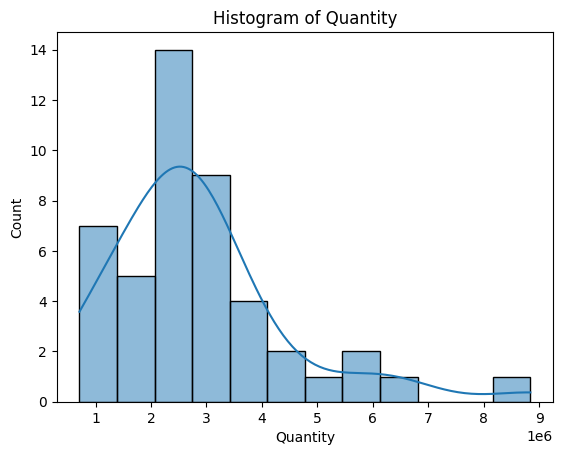

In [16]:
# histogram 
sns.histplot(quantity, kde = True)
plt.title('Histogram of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')

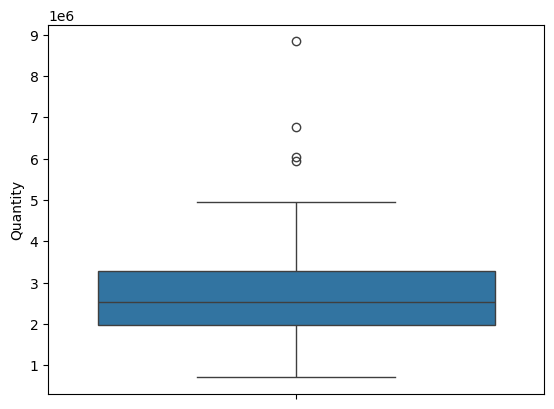

In [17]:
# Box plot 
sns.boxplot(quantity)

#calculate the quantile
Q1 = quantity.quantile(0.25)
Q3 = quantity.quantile(0.75)
IQR = Q3 - Q1

#defind the upper and lower bound

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Find outliers
outliers = competitor[(competitor['Quantity'] < lower_bound) | (competitor['Quantity'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Quantity']))

plt.show()



##### Note: 
- the data is right-skewed ( there are many outlier there are many outlier skew to the right)
-> recommend using Clipping to handle outlier

In [18]:
#Apply Clipping data:
competitor['Quantity_clip'] = competitor['Quantity'].clip(upper=upper_bound, lower=lower_bound)
competitor.head(6)

,Quantity,Sales,Sale_clip,Quantity_clip
Year,,,,
2020-01-01,1939043,1.498821e+06,1.498821e+06,1939043.000
2020-02-01,1013651,6.475269e+05,6.475269e+05,1013651.000
2020-03-01,2451126,1.403030e+06,1.403030e+06,2451126.000
2020-04-01,2989985,2.189583e+06,2.189583e+06,2989985.000
2020-05-01,6049315,4.124948e+06,3.449415e+06,5227025.875
2020-06-01,2418846,1.909533e+06,1.909533e+06,2418846.000


##### Handling Quantity oulier

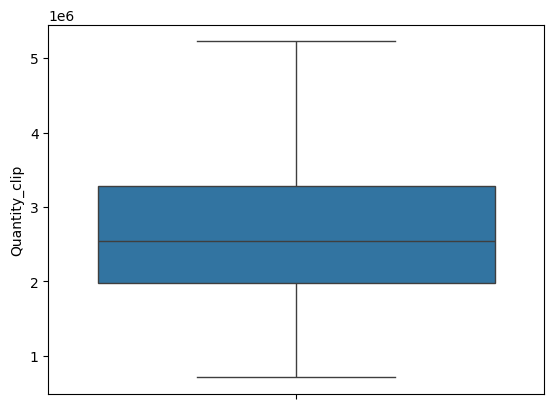

In [19]:
# Box plot 
sns.boxplot(competitor['Quantity_clip'])

#calculate the quantile
Q1 = competitor['Quantity_clip'].quantile(0.25)
Q3 = competitor['Quantity_clip'].quantile(0.75)
IQR = Q3 - Q1

#defind the upper and lower bound

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

# Find outliers
outliers = competitor[(competitor['Quantity_clip'] < lower_bound) | (competitor['Quantity_clip'] > upper_bound)]

# Annotate outliers
for i in outliers.index:
    boxplot.annotate('Outlier', xy=(0, outliers.loc[i, 'Quantity']))

plt.show()



### Plot  Sale and Quantity (before clipping)

Text(0.5, 0, 'Time')

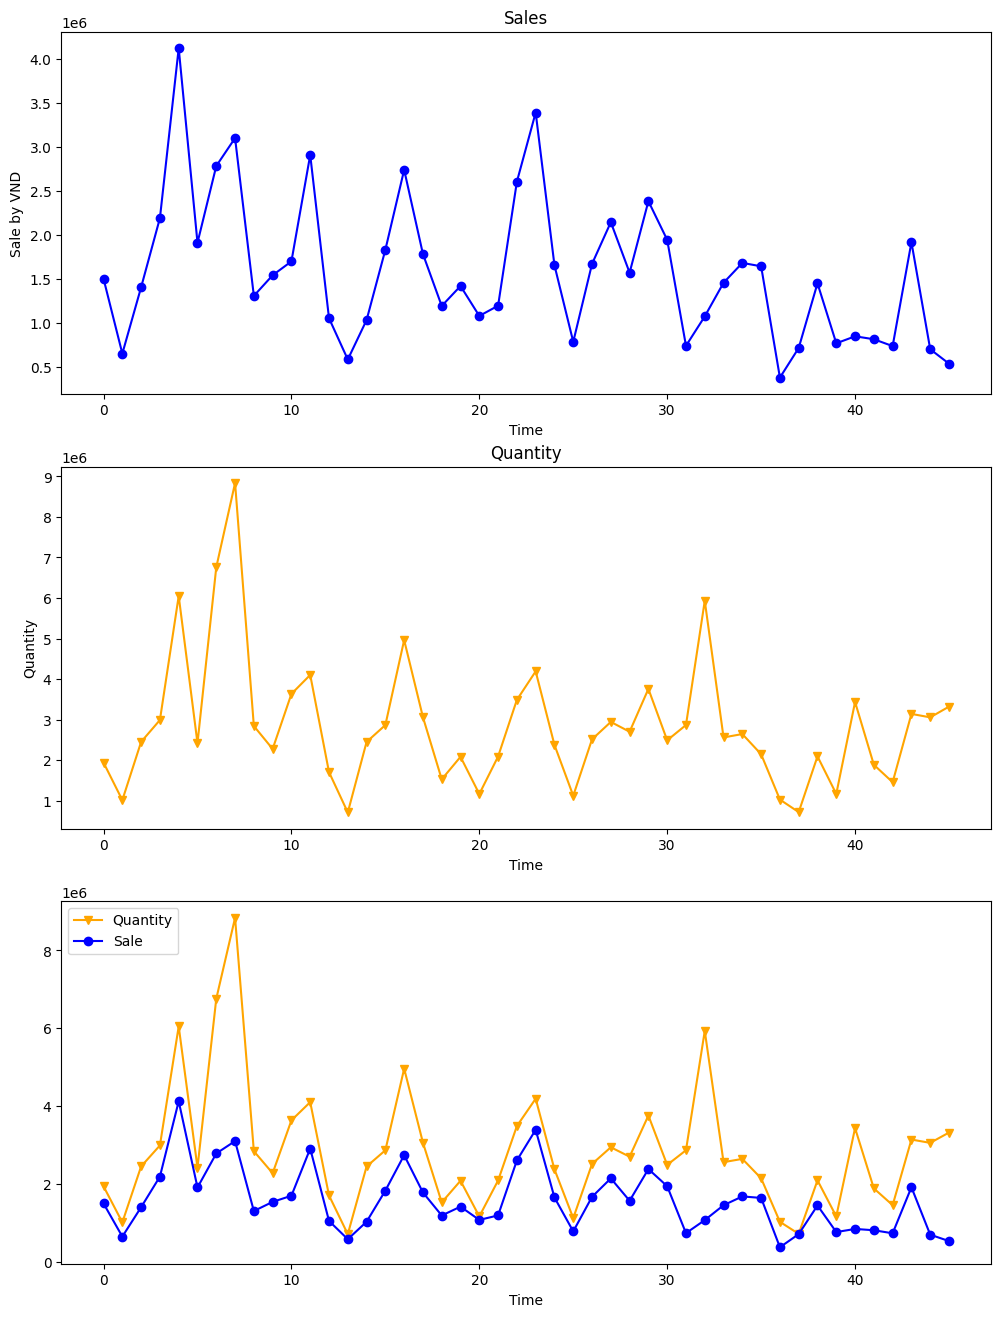

In [20]:
# create figure object 
fig, ax = plt.subplots(3,1,figsize = (12,16))

#Sales Competitor 
ax[0].plot(sale, marker = 'o', linestyle = '-', color = 'b')
ax[0].set_title('Sales')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Sale by VND')

#Quantity competitor
ax[1].plot(quantity, marker = 'v', linestyle = '-', color = 'orange')
ax[1].set_title('Quantity')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Quantity')

# Sale and Quantity competitor
ax[2].plot(quantity, marker = 'v', linestyle = '-', color = 'orange', label = 'Quantity')
ax[2].plot(sale, marker = 'o', linestyle = '-', color = 'Blue',  label = 'Sale')
ax[2].legend(loc = 'upper left')
ax[2].set_xlabel('Time')



### Correlation diagram

<Axes: >

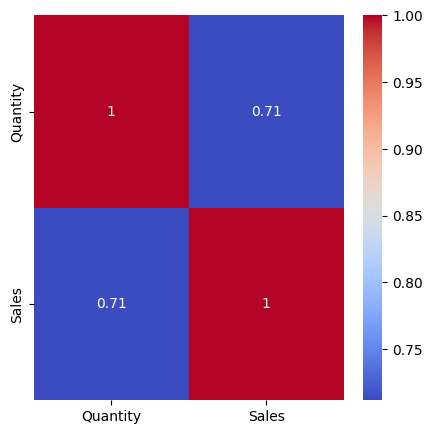

In [21]:
# correlation matrix
corre_matrix = competitor[['Quantity','Sales']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corre_matrix,annot=True,cmap='coolwarm')

## 2.3 Trend, Seasonal, Resid decompose

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Plot trend, resid, season

#### Sale

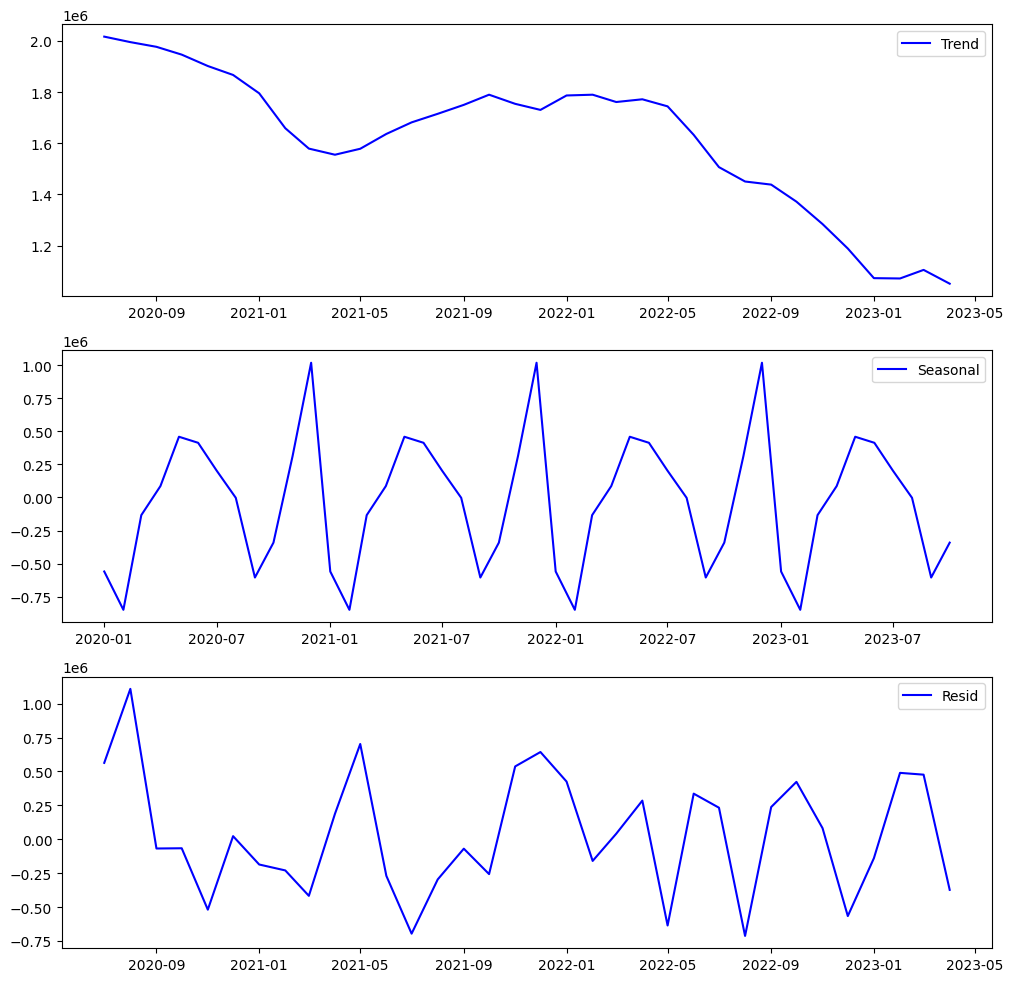

In [23]:
fig, ax = plt.subplots(3,1, figsize = (12,12))

result = seasonal_decompose(competitor['Sale_clip'],model='addictive', period=12)

# Trend
ax[0].plot(result.trend, color = 'b',label = 'Trend')
ax[0].legend(loc = 'upper right')

#Seasonal
ax[1].plot(result.seasonal, color = 'b', label = 'Seasonal')
ax[1].legend(loc = 'upper right')

#Resid
ax[2].plot(result.resid, color = 'b', label = 'Resid')
ax[2].legend(loc = 'upper right')

#### Quantity

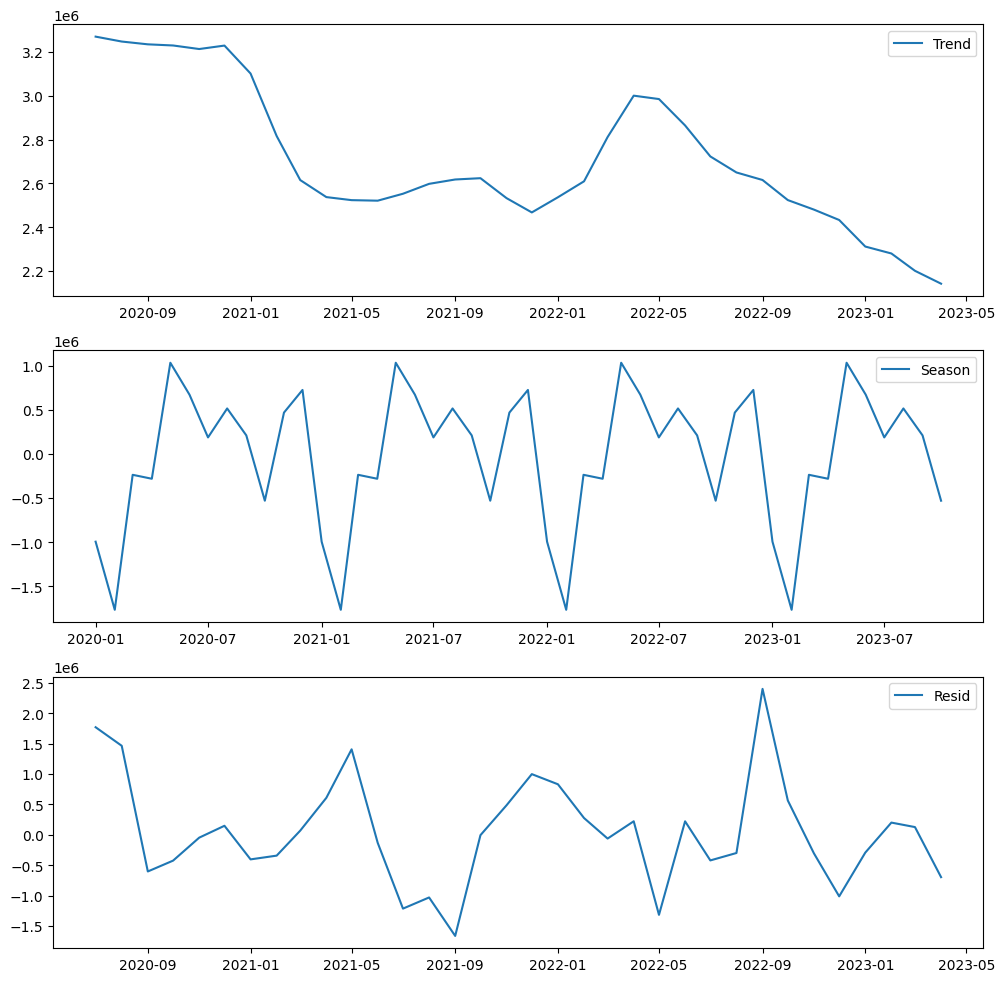

In [24]:
fig, ax = plt.subplots(3,1, figsize = (12,12))

result = seasonal_decompose(competitor['Quantity_clip'],model='addictive',period=12)

# Plot
## Trend
ax[0].plot(result.trend, label = 'Trend')
ax[0].legend(loc = 'upper right')

## Season 
ax[1].plot(result.seasonal, label = 'Season')
ax[1].legend(loc = 'upper right')

## Resid 
ax[2].plot(result.resid, label = 'Resid')
ax[2].legend(loc = 'upper right')


## 2.4 Check Stationary

In [25]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

### Sales

In [26]:
sale_adf = adfuller(competitor['Sale_clip'], autolag='AIC')
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")

adf-statistic: -4.466684419207831 
p_value 0.0002257696056206393 
lags_use: 1


In [27]:
sale_adf = adfuller(competitor['Sale_clip'], regression='ct', maxlag = 1)
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")

adf-statistic: -6.138062037073925 
p_value 1.1210502320489098e-06 
lags_use: 1


#### Note
- The Sale is stationary 

### Quantity 

In [28]:
sale_adf = adfuller(competitor['Quantity_clip'], autolag='AIC')
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")

adf-statistic: -4.475871948014662 
p_value 0.00021735102621246881 
lags_use: 1


In [29]:
sale_adf = adfuller(competitor['Quantity_clip'], regression='ct', maxlag = 1)
print(f"adf-statistic: {sale_adf[0]} \np_value {sale_adf[1]} \nlags_use: {sale_adf[2]}")

adf-statistic: -4.9953607948153005 
p_value 0.0002097876248727138 
lags_use: 0


#### Note 
- The quantity is stationary

## 2.5 PACF and ACF

### Sale

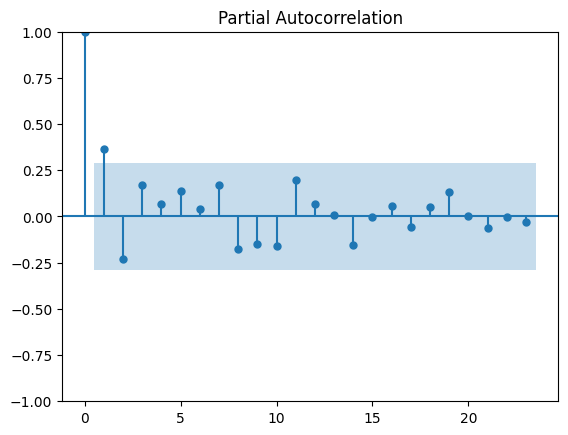

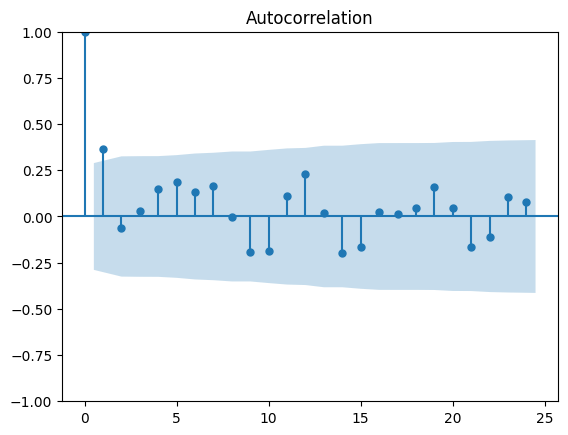

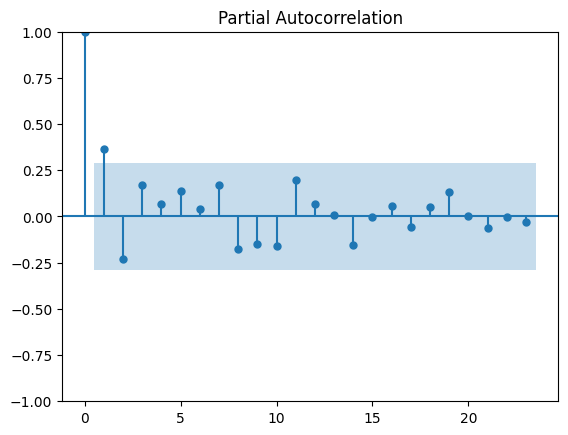

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF on the first axis
plot_acf(competitor['Sale_clip'], lags=24)
plot_pacf(competitor['Sale_clip'], lags=23)


### Quantity 

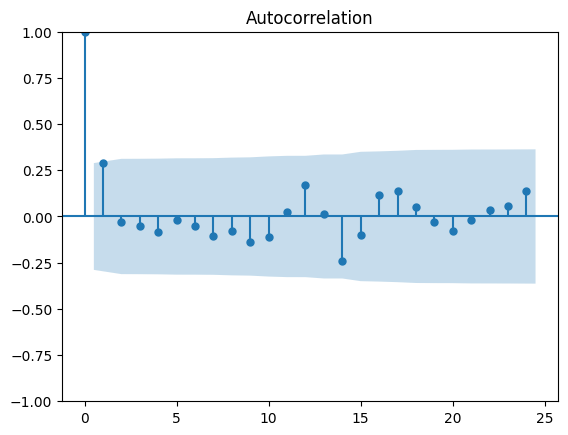

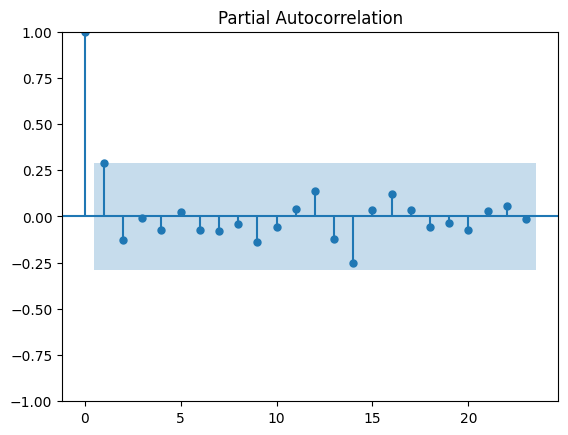

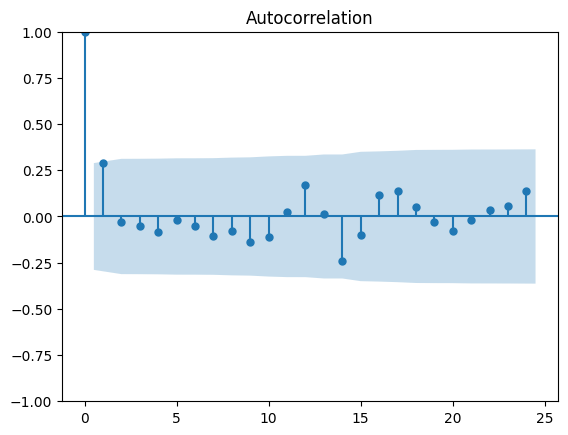

In [40]:
plot_pacf(competitor['Quantity_clip'],lags=23)
plot_acf(competitor['Quantity_clip'],lags=24)